## Students Performance in Exams

### 🌎 Marks secured by the students in high school Students from the United States 🌎


##### WHY WE NEED ANALYZE AND EVALUATE STUDENTS ?
###### Analyzing student information and grades is an essential part of teaching. Teachers assign, collect, and check student work at all times to assess student learning and to modify and improve instruction. Continuous assessment of student learning allows teachers to participate in the continual quality improvement of their courses. Many factors can affect student achievement, including the influence of parents' educational background, test preparation, student health, and more.

#### Now Let's get started

### 1. Objectives of Notebook 📌

- 📊Explore every feature in the dataset;
- 🗺️Practice using libraries to visualize data;
- 🐝Analyze the relationship between attributes;
- 📝Find out the factors that affect the score;

### 2. Import Libraries 📚

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nltk
import missingno as msno
import os
# from wordcloud import WordCloud

from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 3. Read and Explain Dataset 📝

3.1 Reading dataset

In [4]:
#Read data
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Print sample
df.sample(8).reset_index(drop=True).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some college,free/reduced,none,75,68,65
1,female,group E,associate's degree,free/reduced,none,50,56,54
2,female,group B,associate's degree,free/reduced,none,53,70,70
3,female,group E,associate's degree,standard,completed,95,89,92
4,male,group C,some college,standard,completed,93,84,90
5,male,group C,high school,free/reduced,none,66,66,59
6,female,group E,associate's degree,free/reduced,completed,83,86,88
7,male,group D,associate's degree,standard,none,61,55,52


3.2 Explain dataset


📁 The dataset includes 8 columns :
1. gender (object): The gender of the participant
- female
- male
2. Race/Ethnicity (object): The race or ethnicity of the participant
- Group A
- Group B
- Group C
- Group D
- Group E
3. Parental level of eduction (object):The parental level of eduction of the participant
- bachelor's degree
- some college
- master's degree
- associate's degree
- high school
- some high school
4. Lunch (object):Whether the participant is:
- standard
- free/ reduced
5. Test preparation course (object):Whether the participant took the test preparation course or not
- none
- completed
6. Math score (int64): The participants math score
7. Reading score (int64): The participants reading score
8. Writing score (int64): The participants writing score

### 4. Exploratory Data Analysis 🔎

In [6]:
df.head(15).style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


4.1 Explore data information

In [7]:
df.shape

(1000, 8)

In [8]:
df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [18]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

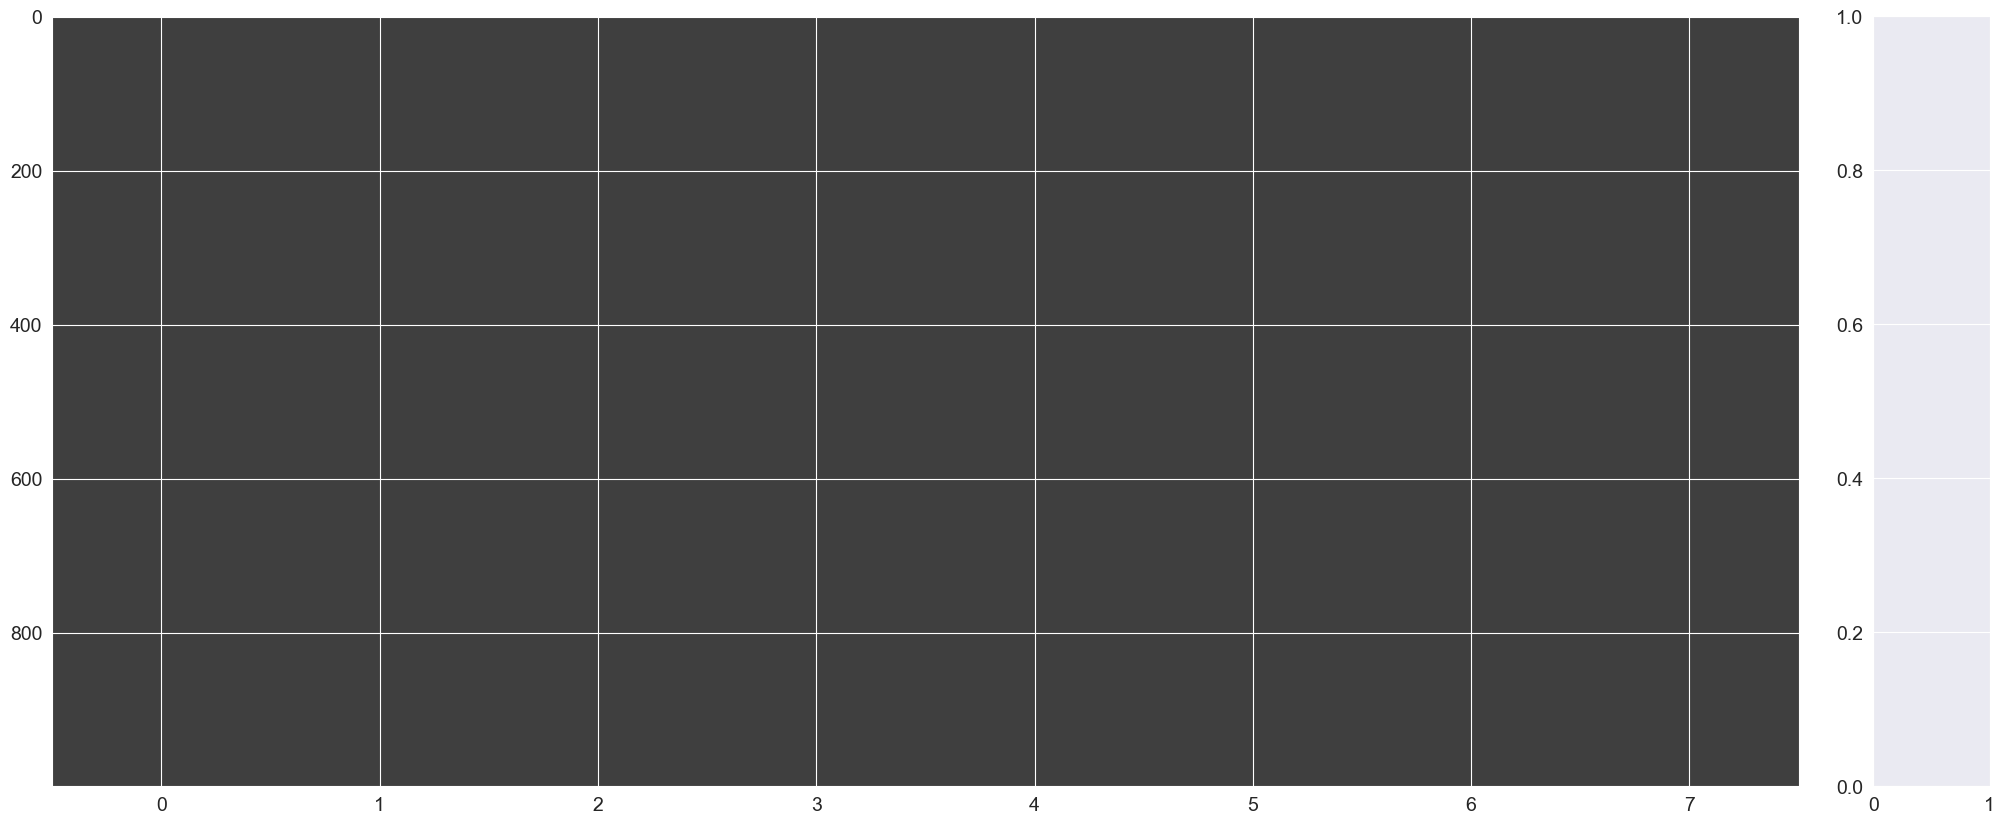

In [19]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

4.2 Getting unique values of each category

In [20]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:white;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [21]:
nunique_df={var:pd.DataFrame(df[var].value_counts())
           for var in {'race/ethnicity', 'parental level of education', 'lunch',
                       'test preparation course','gender'}}

multi_table([nunique_df['race/ethnicity'],nunique_df['parental level of education'],nunique_df['lunch'],nunique_df['test preparation course'],nunique_df['gender']])

,race/ethnicity
group C,319
group D,262
group B,190
group E,140
group A,89
,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179


### 5. Univariate Analysis 📉 (explore each columns)

🌎 In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.\
🌎 Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.

5.1. Categorical Columns

5.1.1 Gender

We'll explore 5 categorical columns in this section, each are:
- gender
- race/ethnicity
- parental level of education
- lunch
- test preparation course

In [23]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [24]:
gender_df=df['gender'].value_counts()
fig=px.treemap(gender_df,
               path=[gender_df.index],
               values=gender_df.values,
               title="Gender distribution",
               color=gender_df.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=800, height=500
              )
fig.data[0].customdata = [51.8, 48.2]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
percents = np.round((100*gender_df.values / sum(gender_df.values)).tolist(),2)
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))

fig.show()

👉 From treemap above, we can notice that female accounts for 51.8% and male accounts for 48.2%

5.1.2 Race/Ethnicity

In [25]:
df['race/ethnicity'].value_counts()


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [26]:
race_ethnicity=df['race/ethnicity'].value_counts()
fig=px.pie(values=race_ethnicity.values,
          names=race_ethnicity.index,
          color_discrete_sequence=px.colors.sequential.PuBu,
          title="Race/Ethnicity distribution", template="plotly_dark")

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=0.2)))
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

👉 Group C and group D account for a larger proportion than other groups, group A has at least 8.9%.



5.1.3 Parental level of education


In [27]:
level=df['parental level of education'].value_counts()


Let's define a helper function that turns a column containing lists of values (like df.parental level of education) into a data frame with one column for each possible option.

In [28]:
fig=px.bar(y=level.values,
          x=level.index,
          color=level.index,
          color_discrete_sequence=px.colors.sequential.deep,
          text=level.values,
          title="Parental level of education distribution",
          template="plotly_dark")
fig.update_layout(xaxis_title="Level of education",
                 yaxis_title="Count",
                 font=dict(size=17,family="Franklin Gpthic"))
fig.show()

👉The majority of parents have studied some college and asscociate's degree, the number of master's degrees accounted for less.

**WordCoud of Parental level of education shown as below:**

In [29]:
text = " ".join(education for education in df["parental level of education"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

NameError: name 'WordCloud' is not defined

5.1.4 Lunch


In [30]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [31]:
lunch = df['lunch'].value_counts()

fig = px.bar(y=lunch.values, 
             x=lunch.index, 
             color = lunch.index,
             color_discrete_sequence=px.colors.sequential.dense,
             text=lunch.values,
             title= 'Distribution of Lunch type',
             template= 'plotly_dark')

fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Lunch type",
    yaxis_title="Count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

👉 Most of the students are eating standard lunch (to their fullest).

5.1.5 Test preparation course


In [32]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [33]:
test=df['test preparation course'].value_counts()
fig=px.treemap(test,
               path=[test.index],
               values=test.values,
               title="Test preparation course distribution",
               color=test.index,
               color_discrete_sequence=px.colors.sequential.PuBuGn,
               template='plotly_dark',
               width=800, height=500
              )
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
percents = np.round((100*gender_df.values / sum(test.values)).tolist(),2)
fig.update_layout(font=dict(size=19,family="Franklin Gothic"))

fig.show()

👉 From treemap above, the number of students who did not take the exam preparation course more than the number of students who completed the course.

5.2. Numeric Columns

We'll explore 3 numeric columns in this section, each are:
- math score
- reading score
- writing score

5.2.1 Math score


In [34]:
group_labels = ['math score']
fig1 = px.box(y=df['math score'],template= 'plotly_dark', title = 'Math score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

5.2.2 Reading score

In [35]:
group_labels = ['reading score']
fig1 = px.box(y=df['reading score'],template= 'plotly_dark', title = 'Reading score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

5.2.3 Writing score

In [36]:
group_labels = ['writing score']
fig1 = px.box(y=df['writing score'],template= 'plotly_dark', title = 'Writing score')
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig1.show()

### 6. Multivariate Analysis 📈 (explore relationship between attributes)

6.1.Types of scores

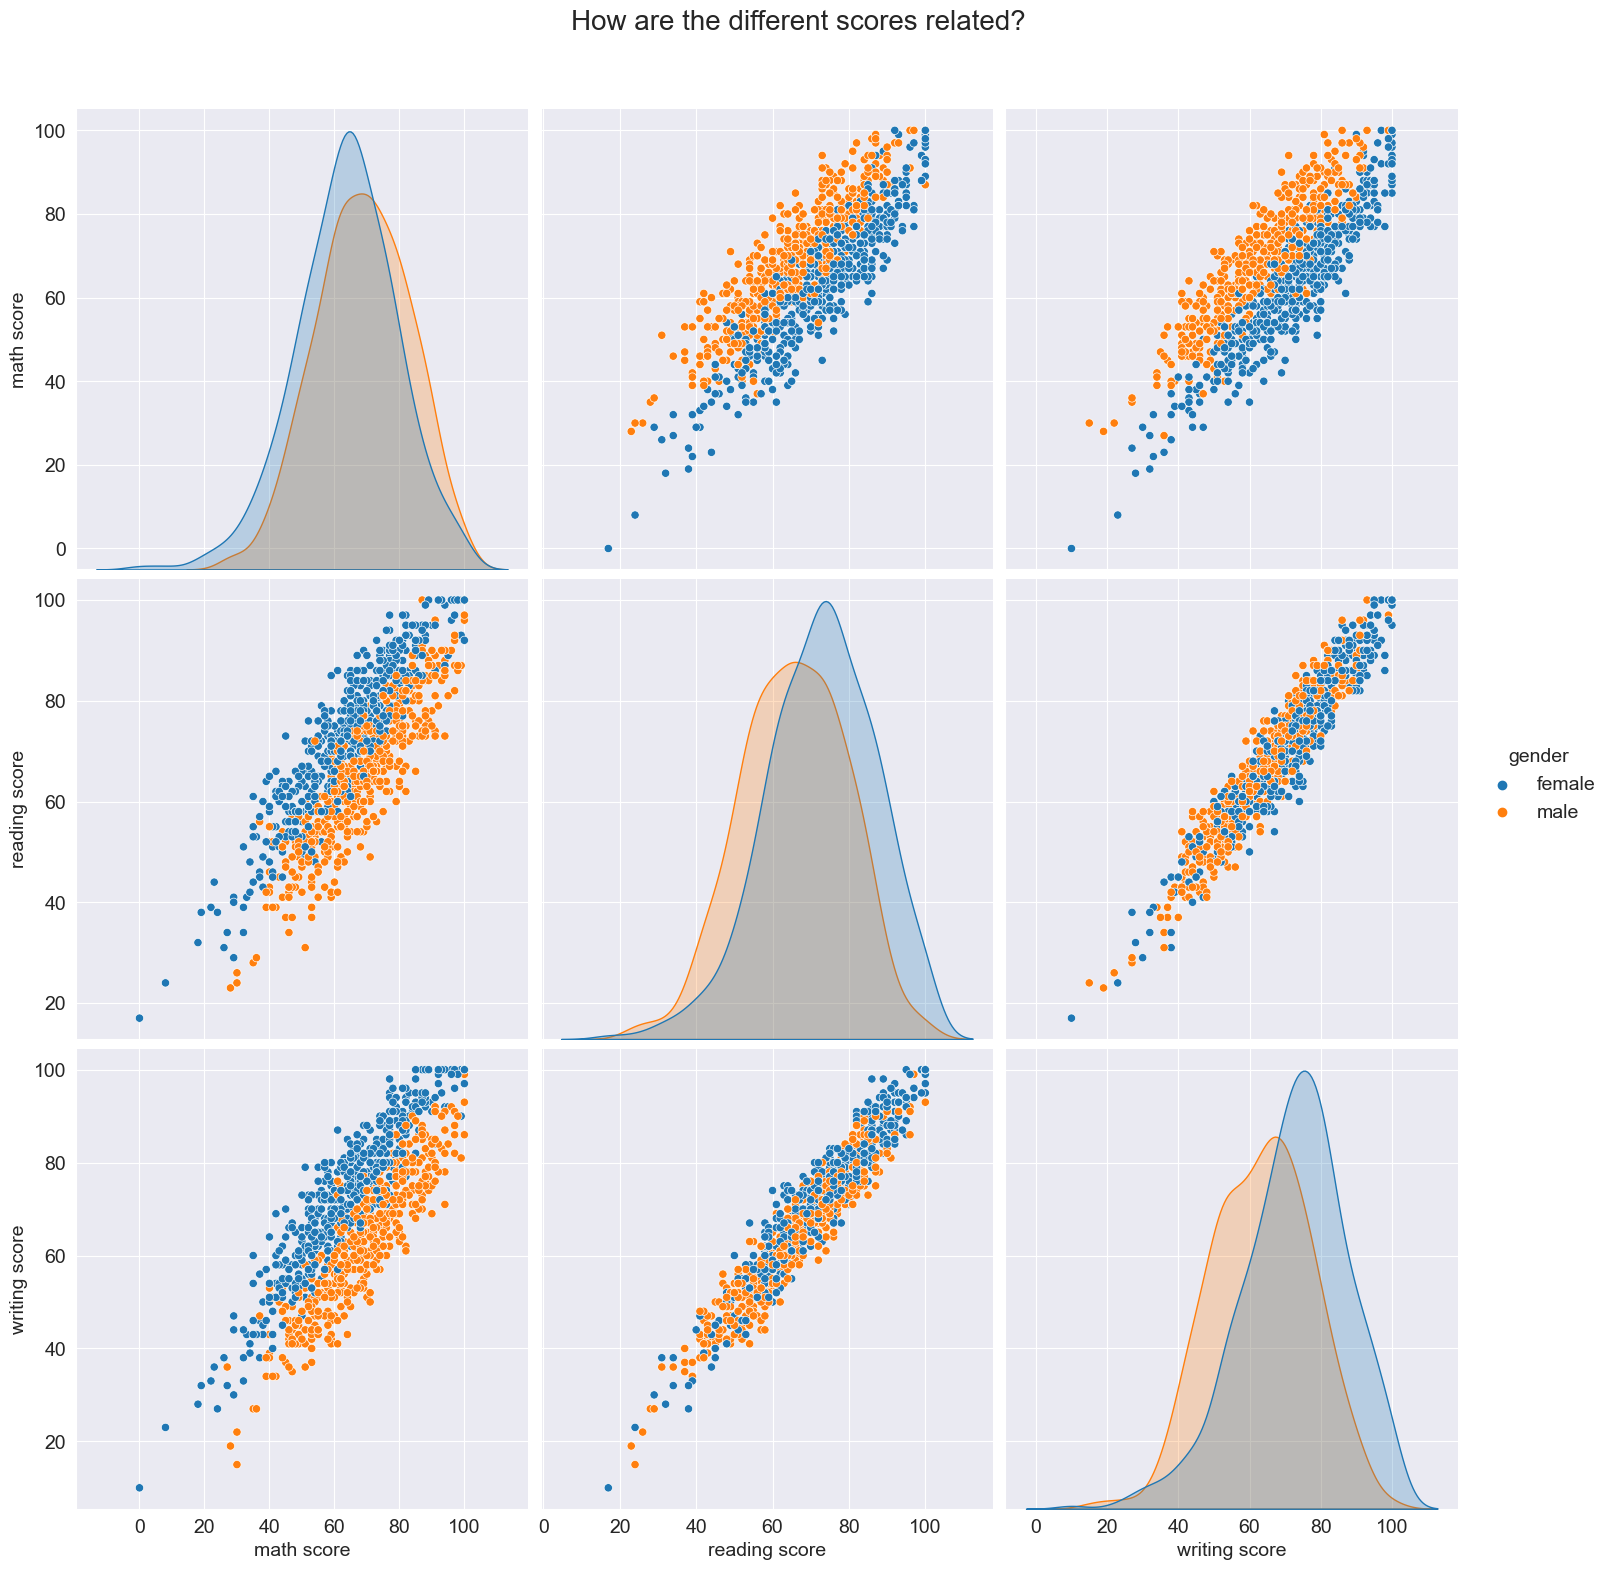

In [37]:
fig = sns.pairplot(df[["math score", "reading score", "writing score", "gender"]], hue="gender", height=5);
fig.fig.suptitle("How are the different scores related?", size=20, y=1.05);

Text(0.5, 1.0, 'Confusion Matrix')

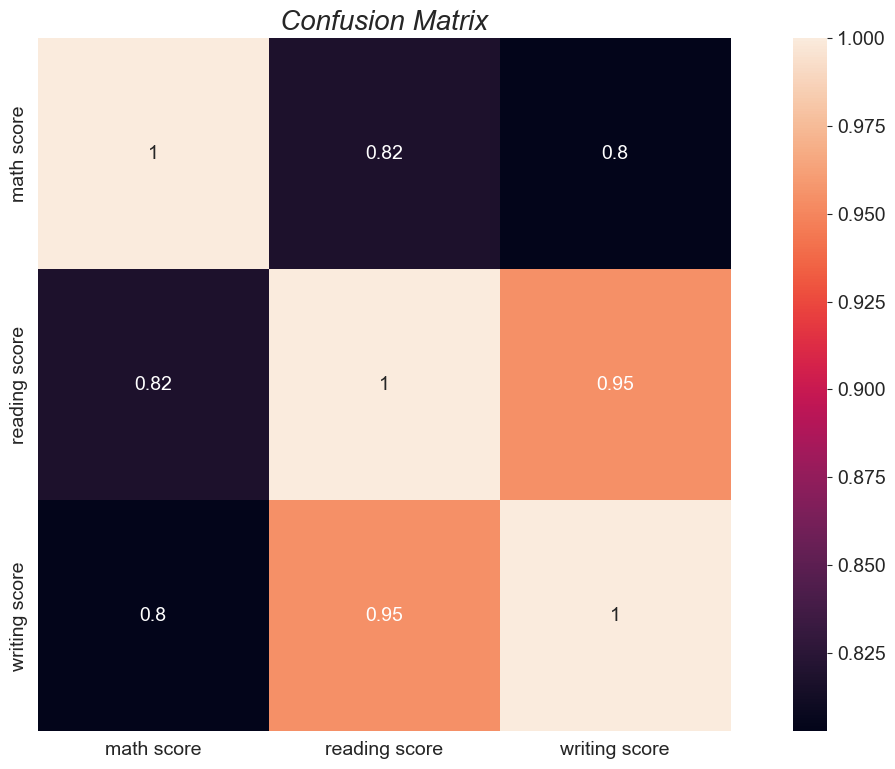

In [38]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True, square=True);
plt.title("Confusion Matrix", fontsize=20, fontstyle="oblique")

👉 From the heatmap, it can be seen that between the types of scores have a </mark>correlation relationship with each other</mark>. Specifically, this high score tends to lead to other types of scores as well.

6.2. Score and gender

To check the trend between gender and score, I will calculate the average score by gender

In [39]:
gender_mean=df.groupby('gender')[['math score','reading score','writing score']].mean().round(2).T

fig = go.Figure(data=[go.Table(
    header=dict(values=['','Male', 'Female'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center',
               height=40,
               font_size=20),
    cells=dict(values=[gender_mean.index,
                       gender_mean['male'],
                       gender_mean['female']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center',
              height=40,
              font_size= 20))
])

fig.update_layout(width=600, height=400)
fig.show()

👉From the table above, it can be seen that the average score of math of the male is higher than that of the female, while the average score of reading and writing of the female is higher than that of the male.

6.3. Score and lunch

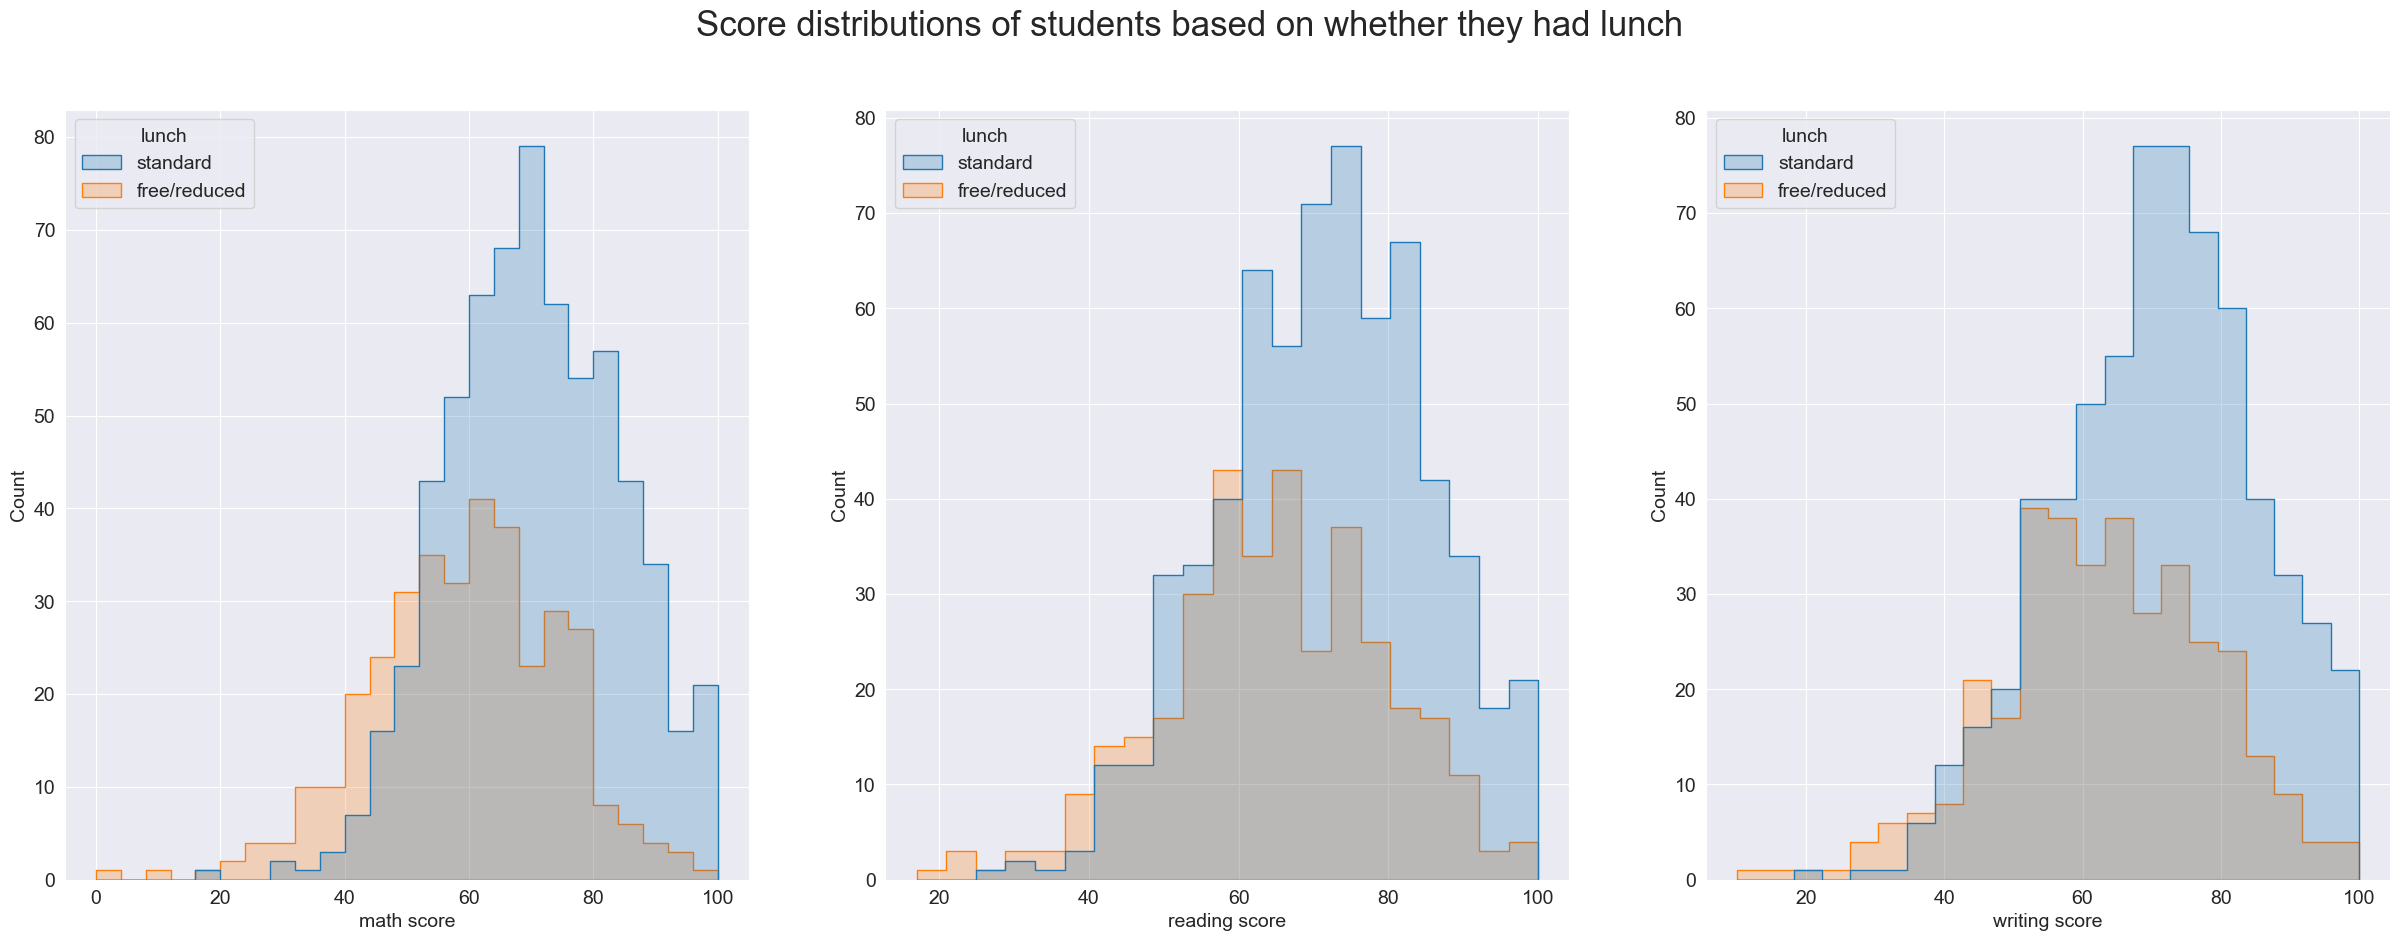

In [40]:
fig, ax=plt.subplots(ncols=3,figsize=(30,10))

fig.suptitle('Score distributions of students based on whether they had lunch',size=25)

a=sns.histplot(df,x='math score',ax=ax[0], hue='lunch',element='step')

b=sns.histplot(df,x='reading score',ax=ax[1],hue='lunch',element='step')

c=sns.histplot(df,x='writing score',ax=ax[2],hue='lunch',element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

👉 Surprisingly, the way you choose your lunch has a big impact on your score. It can be seen that the number of students who chose the standard lunch had a higher score than the free/reduced lunch option.

6.4. Parental level of eduction and scores

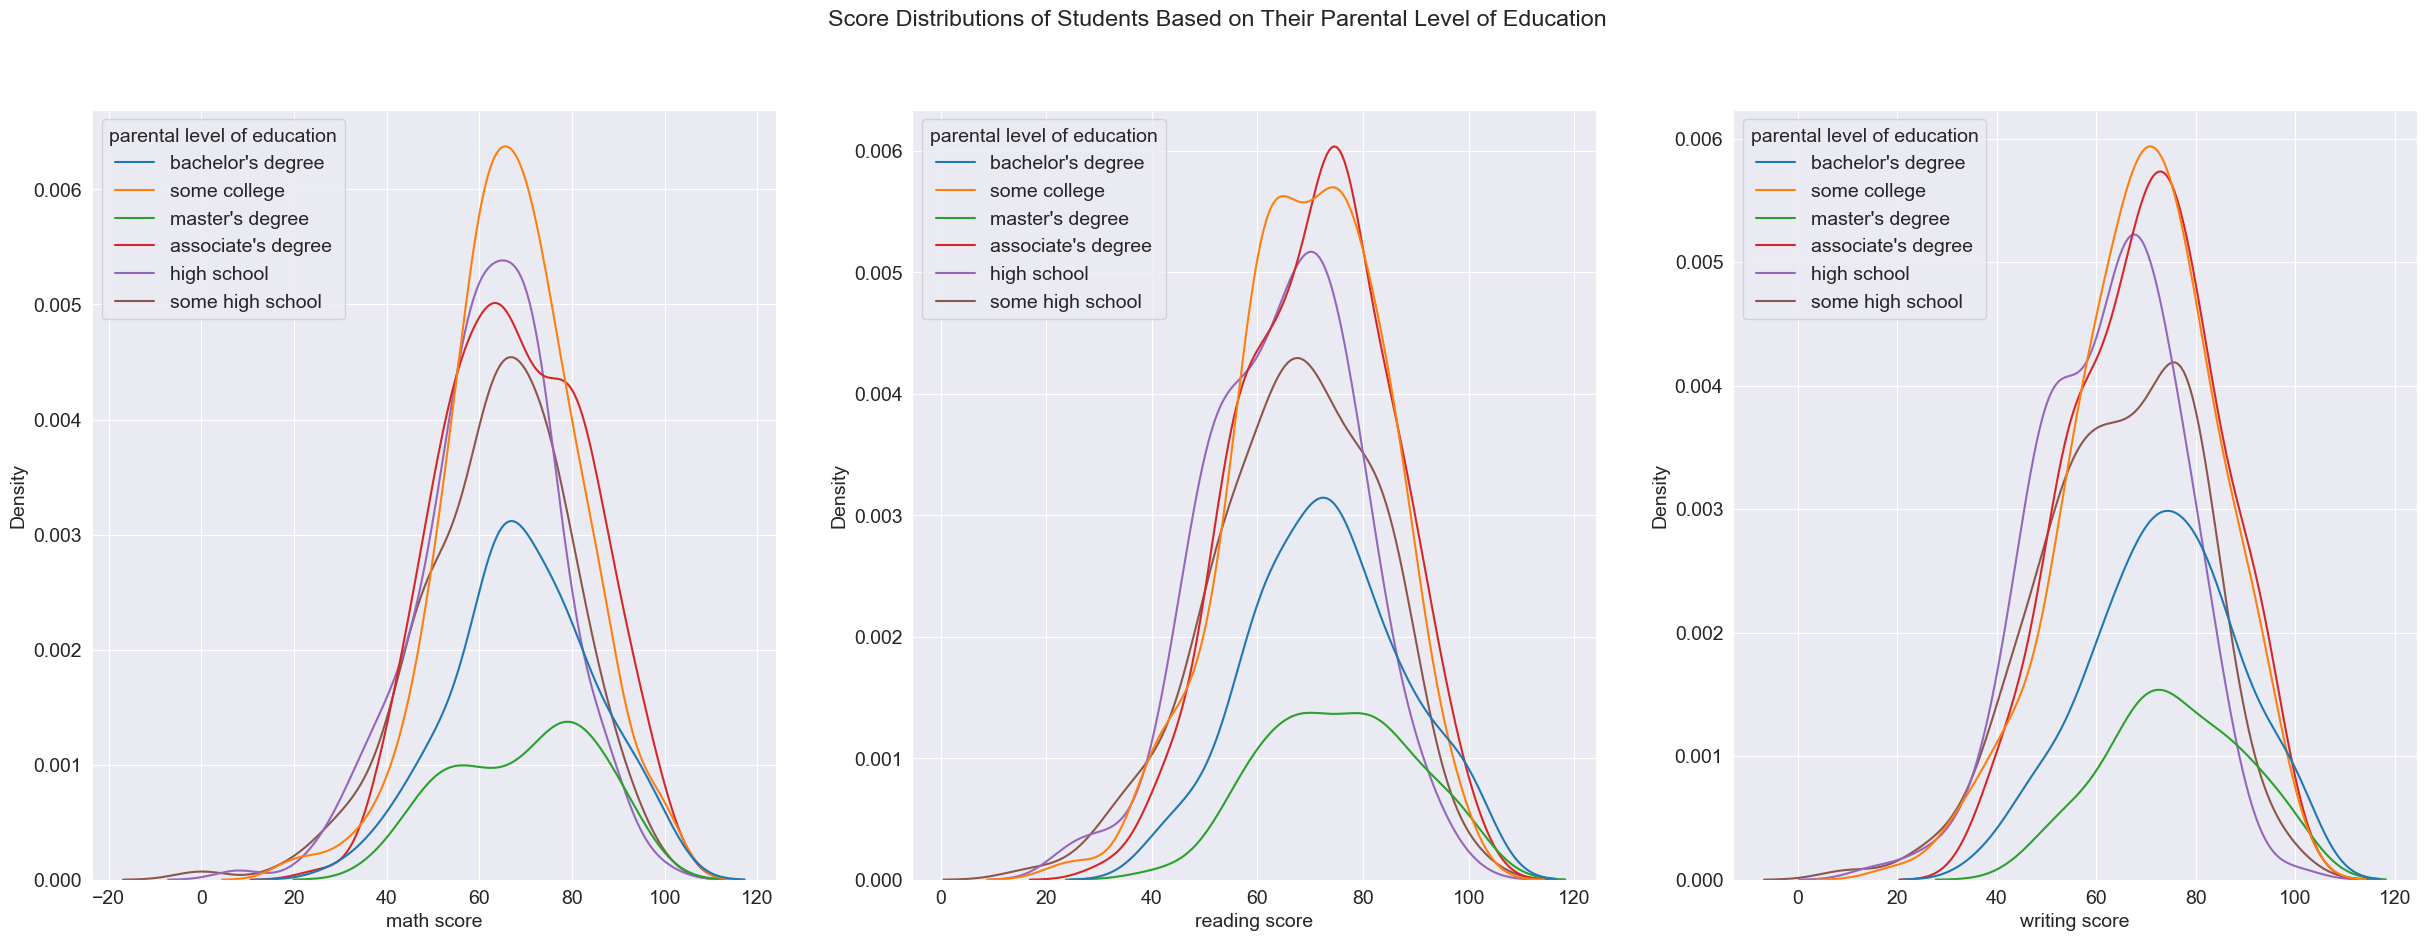

In [41]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='parental level of education')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='parental level of education')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

👉 From the graphs above, it can be seen that the education level of parents does not have much influence on the scores of their children. It can be seen that when parents have a master's degree, the distribution of their children's scores is higher.

6.5. Race/ethnicity and score

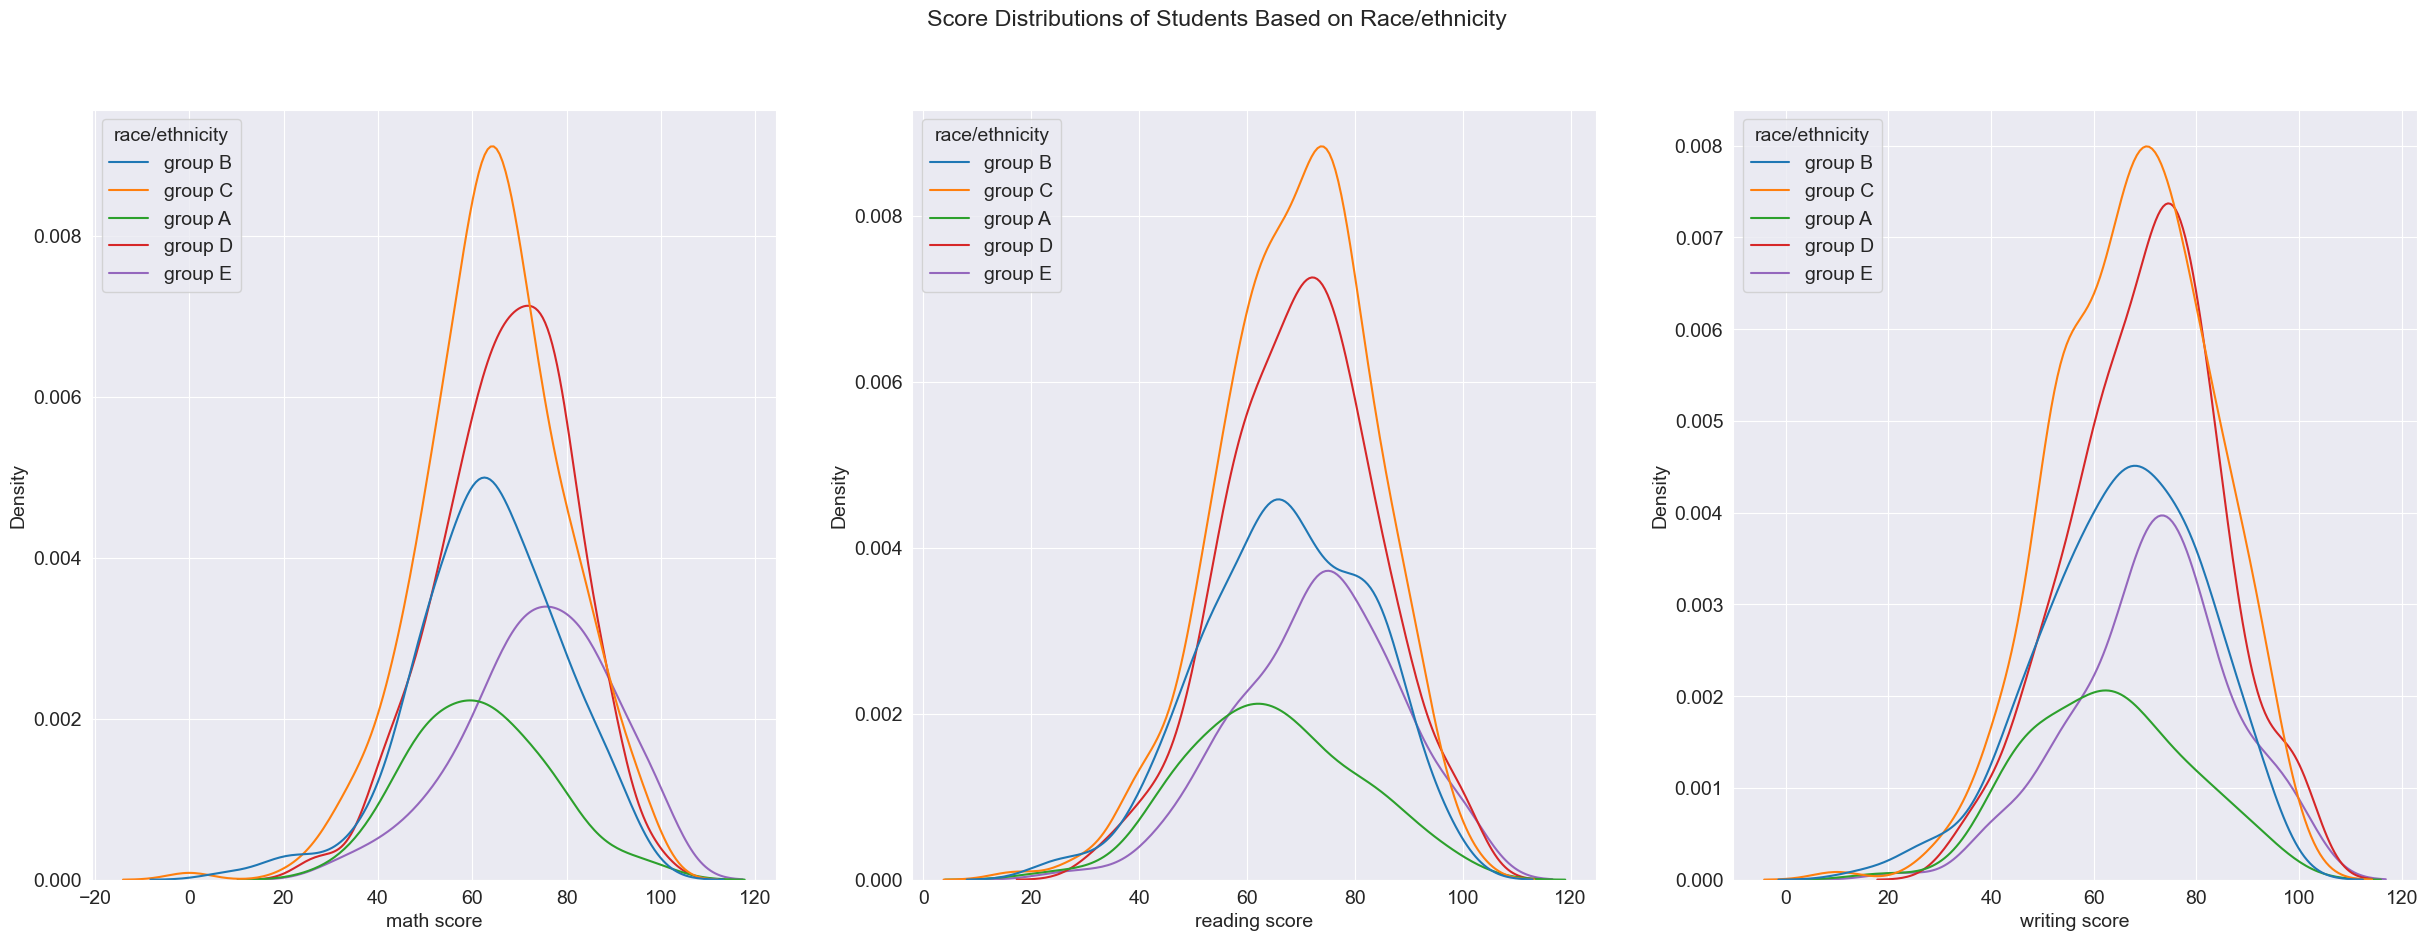

In [42]:
fig, ax=plt.subplots(ncols=3, figsize=(30,10))

fig.suptitle('Score Distributions of Students Based on Race/ethnicity')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='race/ethnicity')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='race/ethnicity')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='race/ethnicity')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

👉 By observing the kde plot above, theres slight shift in between the different groups. Group E had the most right shift compared to the other groups. Therefore, being group E as a race/ethnicity will make you more likely to get higher scores than others.

6.6. Test preparation course and score

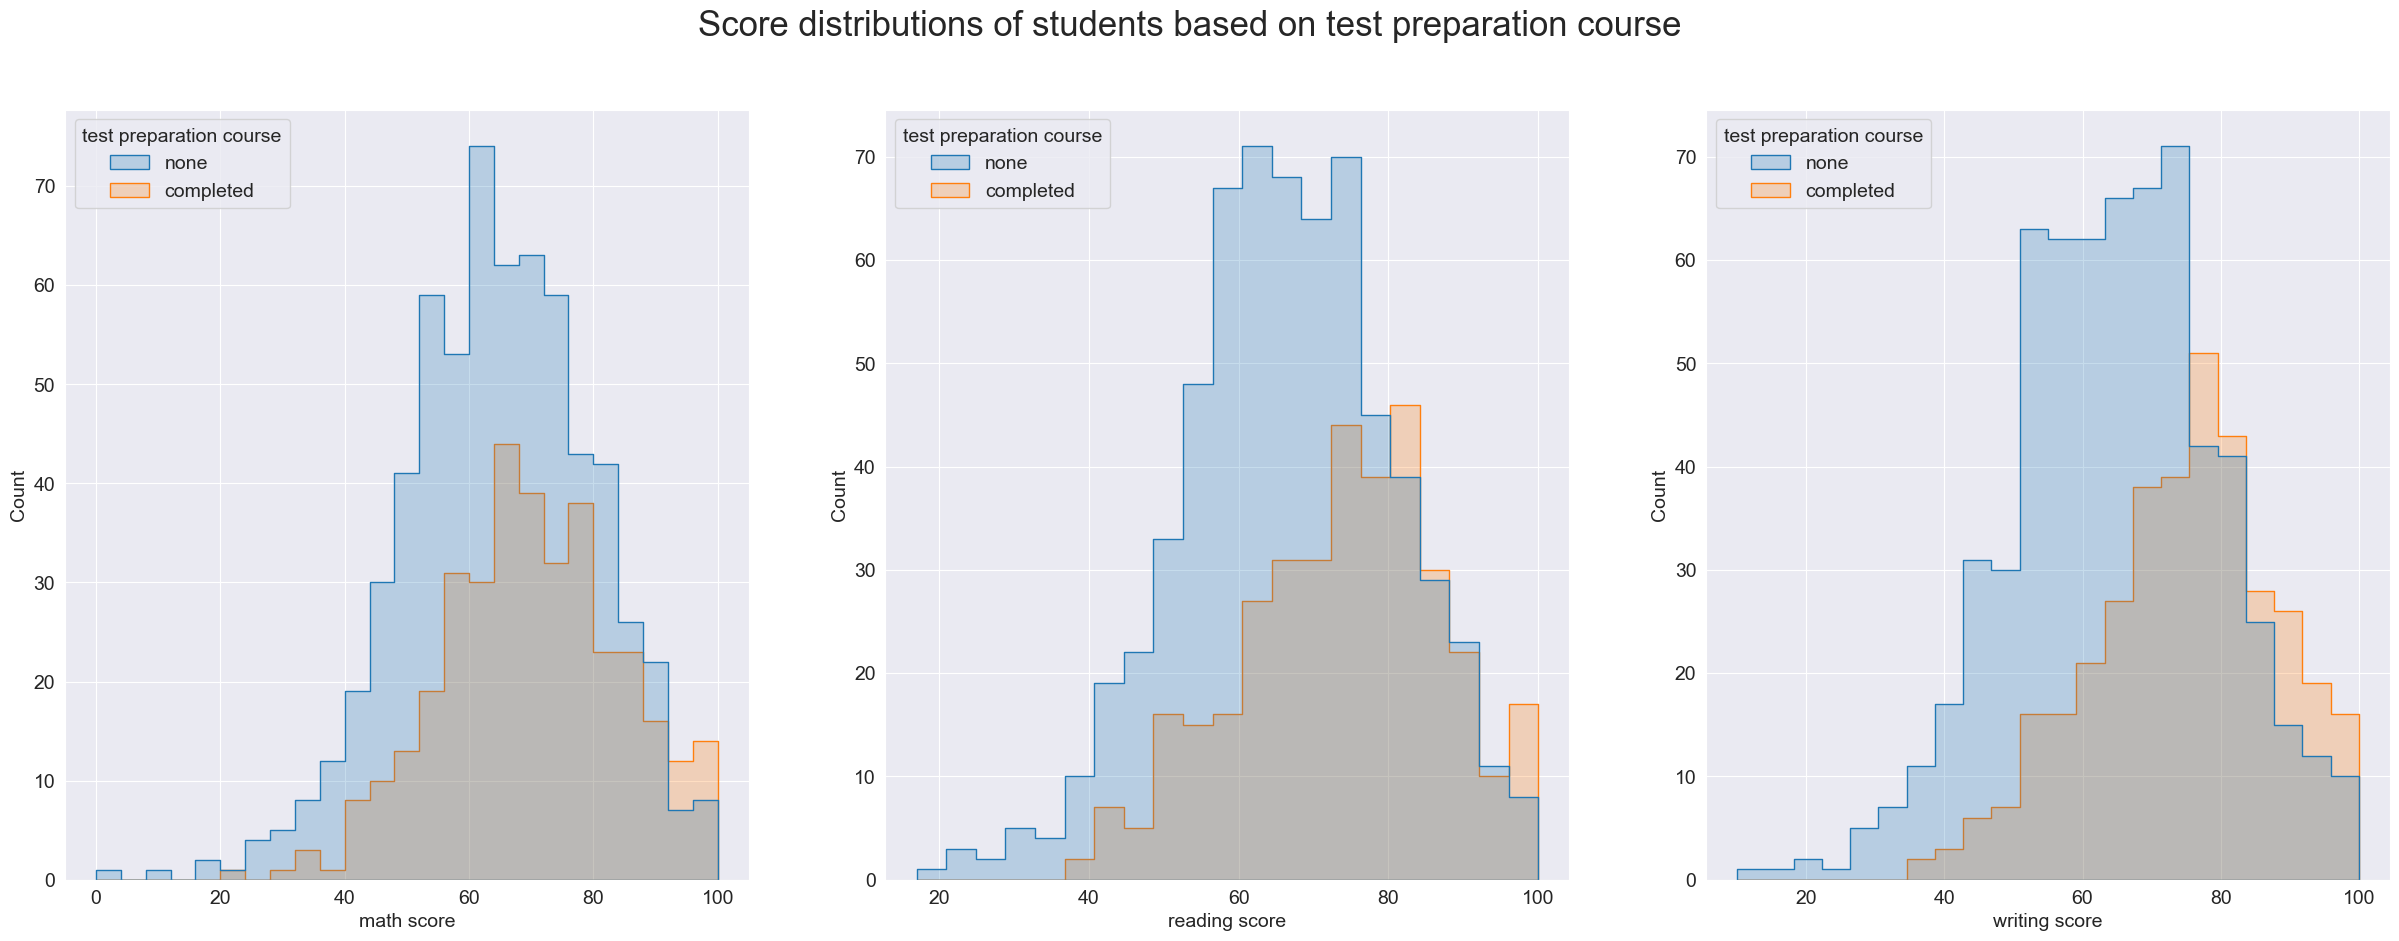

In [43]:
fig, ax=plt.subplots(ncols=3,figsize=(30,10))

fig.suptitle('Score distributions of students based on test preparation course',size=25)

a=sns.histplot(df,x='math score',ax=ax[0], hue='test preparation course',element='step')

b=sns.histplot(df,x='reading score',ax=ax[1],hue='test preparation course',element='step')

c=sns.histplot(df,x='writing score',ax=ax[2],hue='test preparation course',element='step')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))

sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

👉 The number of students who completed the test preparation course tended to have higher scores than those who did not.

6.7. Race/ethnicity and parental level of education


In [44]:
fig=px.sunburst(df,path=['race/ethnicity','parental level of education'])
fig.show();

👉 All races/ethnicities have various parental levels of education

### 7. Conclusion 🐝

🗺️ Some interesting things from the above analysis :
- In terms of gender:
  - The male sex ratio is more than 10% more than female, demonstrating the current gender imbalance
  - Male tend to do better in math than female
  - Female tend to do better at reading and writing than male
- In terms of race/ethnicity:
  - No discernible effect
  - Group E tends to have higher scores than other groups
- In terms of lunch (standard, free/reduced):
  - The ratio of the free/reduced lunch option is much higher than the standard lunch option
  - Standard lunch options tend to have higher scores than the free/reduced
- In terms of test preparation course (completed/none):
  - The number of students who did not take the exam preparation course more than the number of students who completed the course
  - The number of students who completed the test preparation course tended to have higher scores than those who did not
- In terms of parental level of education :
  - Parents' education level did not have much effect on students' test scores